In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai import *
from fastai.tabular import *

# Rossmann

## Data preparation

To create the feature-engineered train_clean and test_clean from the Kaggle competition data, run `rossman_data_clean.ipynb`. One important step that deals with time series is this:

```python
add_datepart(train, "Date", drop=False)
add_datepart(test, "Date", drop=False)
```

In [3]:
path = Path('/mnt/datadrive1/h216520/fastai_v3/data/rossman')
train_df = pd.read_pickle(path/'train_clean')

In [4]:
train_df.head().T

,0,1,2,3,4
index,0,1,2,3,4
Store,1,2,3,4,5
DayOfWeek,5,5,5,5,5
Date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
Sales,5263,6064,8314,13995,4822
Customers,555,625,821,1498,559
Open,1,1,1,1,1
Promo,1,1,1,1,1
StateHoliday,False,False,False,False,False
SchoolHoliday,1,1,1,1,1


In [5]:
n = len(train_df); n

844338

### Experimenting with a sample

In [6]:
idx = np.random.permutation(range(n))[:2000]
idx.sort()
small_train_df = train_df.iloc[idx[:1000]]
small_test_df = train_df.iloc[idx[1000:]]
small_cont_vars = ['CompetitionDistance']#, 'Mean_Humidity']
small_cat_vars =  ['Store', 'DayOfWeek', 'PromoInterval']
small_train_df = small_train_df[small_cat_vars + small_cont_vars + ['Sales']]
small_test_df = small_test_df[small_cat_vars + small_cont_vars + ['Sales']]

In [7]:
small_train_df.head()

,Store,DayOfWeek,PromoInterval,CompetitionDistance,Sales
722,724,5,NaN,5900.0,8328
1236,124,4,NaN,1410.0,4046
1268,156,4,"Mar,Jun,Sept,Dec",2020.0,8828
3223,1000,3,"Jan,Apr,Jul,Oct",2230.0,8193
5240,790,1,NaN,9070.0,10308


In [8]:
small_test_df.head()

,Store,DayOfWeek,PromoInterval,CompetitionDistance,Sales
423288,234,6,NaN,4370.0,8799
423428,374,6,NaN,1150.0,4184
425296,20,4,"Jan,Apr,Jul,Oct",2340.0,8148
425640,365,4,"Feb,May,Aug,Nov",2410.0,3638
425671,396,4,NaN,23130.0,8955


In [9]:
categorify = Categorify(small_cat_vars, small_cont_vars)
categorify(small_train_df)
categorify(small_test_df, test=True)

In [10]:
small_test_df.head()

,Store,DayOfWeek,PromoInterval,CompetitionDistance,Sales
423288,234.0,6,NaN,4370.0,8799
423428,NaN,6,NaN,1150.0,4184
425296,NaN,4,"Jan,Apr,Jul,Oct",2340.0,8148
425640,365.0,4,"Feb,May,Aug,Nov",2410.0,3638
425671,396.0,4,NaN,23130.0,8955


In [11]:
small_train_df.PromoInterval.cat.categories

Index(['Feb,May,Aug,Nov', 'Jan,Apr,Jul,Oct', 'Mar,Jun,Sept,Dec'], dtype='object')

In [12]:
small_train_df['PromoInterval'].cat.codes[:5]

722    -1
1236   -1
1268    2
3223    1
5240   -1
dtype: int8

In [13]:
fill_missing = FillMissing(small_cat_vars, small_cont_vars)
fill_missing(small_train_df)
fill_missing(small_test_df, test=True)

In [14]:
small_train_df[small_train_df['CompetitionDistance_na'] == True]

,Store,DayOfWeek,PromoInterval,CompetitionDistance,Sales,CompetitionDistance_na
30809,622,2,NaN,2380.0,6162,True
63981,879,2,"Feb,May,Aug,Nov",2380.0,4475,True
231885,291,5,NaN,2380.0,7928,True
287674,291,4,NaN,2380.0,8869,True
336626,622,6,NaN,2380.0,2478,True
411361,622,5,NaN,2380.0,4198,True


### Preparing full data set

In [15]:
train_df = pd.read_pickle(path/'train_clean')
test_df = pd.read_pickle(path/'test_clean')

In [16]:
len(train_df),len(test_df)

(844338, 41088)

In [17]:
procs=[FillMissing, Categorify, Normalize]

In [22]:
cat_vars = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday', 'CompetitionMonthsOpen',
    'Promo2Weeks', 'StoreType', 'Assortment', 'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear',
     'Week', 'Promo_fw', 'Promo_bw', 'StateHoliday_fw', 'StateHoliday_bw',
    'SchoolHoliday_fw', 'SchoolHoliday_bw']#'State', 'Events',

cont_vars = ['CompetitionDistance','AfterStateHoliday', 'BeforeStateHoliday', 'Promo', 'SchoolHoliday']
#              'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
#                'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 
#                'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 'trend_DE']

In [23]:
dep_var = 'Sales'
df = train_df[cat_vars + cont_vars + [dep_var,'Date']].copy()

In [24]:
test_df['Date'].min(), test_df['Date'].max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

In [25]:
cut = train_df['Date'][(train_df['Date'] == train_df['Date'][len(test_df)])].index.max()
cut

41395

In [26]:
valid_idx = range(cut)

In [27]:
df[dep_var].head()

0     5263
1     6064
2     8314
3    13995
4     4822
Name: Sales, dtype: int64

In [42]:
data = (TabularList.from_df(df, path=path, cat_names=cat_vars, cont_names=cont_vars, procs=procs)
                   .split_by_idx(valid_idx)
                   .label_from_df(cols=dep_var, label_cls=FloatList)#, log=True)
                   .databunch())

In [29]:
doc(FloatList)

## Model

In [45]:
# max_log_y = np.log(np.max(train_df['Sales'])*1.2)
max_log_y = np.max(train_df['Sales'])*1.2
y_range = torch.tensor([0, max_log_y], device=defaults.device)
print(y_range)

tensor([    0.0000, 49861.1992], device='cuda:0')


In [46]:
learn = tabular_learner(data, layers=[1000,500], ps=[0.001,0.01], emb_drop=0.04, 
                        y_range=y_range, metrics=exp_rmspe)

In [47]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(1116, 50)
    (1): Embedding(8, 5)
    (2): Embedding(4, 3)
    (3): Embedding(13, 7)
    (4): Embedding(32, 17)
    (5): Embedding(3, 2)
    (6): Embedding(26, 14)
    (7): Embedding(27, 14)
    (8): Embedding(5, 3)
    (9): Embedding(4, 3)
    (10): Embedding(4, 3)
    (11): Embedding(24, 13)
    (12): Embedding(9, 5)
    (13): Embedding(53, 27)
    (14): Embedding(7, 4)
    (15): Embedding(7, 4)
    (16): Embedding(4, 3)
    (17): Embedding(4, 3)
    (18): Embedding(9, 5)
    (19): Embedding(9, 5)
    (20): Embedding(3, 2)
  )
  (emb_drop): Dropout(p=0.04)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=197, out_features=1000, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.001)
    (4): Linear(in_features=1000, out_features=500, bias=T

In [48]:
len(data.train_ds.cont_names)

5

In [49]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


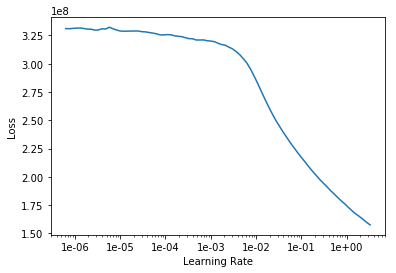

In [50]:
learn.recorder.plot()

In [53]:
learn.fit_one_cycle(5, 1e-3, wd=0.2)

epoch,train_loss,valid_loss,exp_rmspe
1,1194863.375000,1213298.625000,nan
2,959708.562500,981696.250000,nan


KeyboardInterrupt: 

In [59]:
MSELossFlat?

In [37]:
learn.save('1')

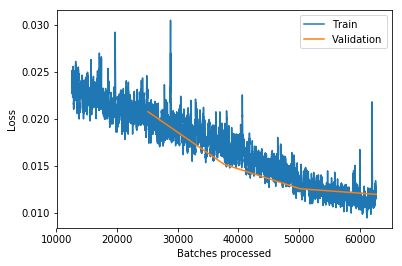

In [38]:
learn.recorder.plot_losses(last=-1)

In [39]:
learn.load('1');

In [40]:
learn.fit_one_cycle(5, 3e-4)

epoch,train_loss,valid_loss,exp_rmspe
1,0.012698,0.012650,0.111464
2,0.012055,0.012749,0.109537
3,0.011212,0.016251,0.115795
4,0.010065,0.014162,0.112560
5,0.009026,0.013560,0.108083


In [41]:
learn.fit_one_cycle(5, 3e-4)

epoch,train_loss,valid_loss,exp_rmspe
1,0.010763,0.013656,0.110554
2,0.011370,0.013110,0.114956
3,0.010961,0.014796,0.116480
4,0.010477,0.013811,0.114345
5,0.010968,0.013934,0.112746


(10th place in the competition was 0.108)

## fin